In [116]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import netCDF4

def df2contourf(ax, df, vname, interval, extend, cblabel=None, title=None):

    pv = df.pivot(index='datetime', columns='depth', values=vname)
    pv = pv.resample('D', how='mean')
    date = pv.index
    depth = pv.columns
    if vname == 'chlorophyll':
        value = pv.values.T * 2.18
    else:
        value = pv.values.T

    cf = ax.contourf(date, -depth, value, interval, extend=extend, cmap='seismic')
    cb = plt.colorbar(cf, ax=ax)
    cb.set_label(cblabel)
    
    if title is not None: ax.set_title(title)
    ax.xaxis.set_major_formatter( DateFormatter('%d') )
    ax.set_ylabel('depth(m)')
    ax.set_ylim(-13.5, 0)    
    #ax.set_xlim(dt.datetime(2012,8,21,0), dt.datetime(2012,8,28,0))


In [108]:
obsfile = '/Users/teruhisa/Dropbox/Data/obweb/download/vel_201208.csv'
names = ['station','datetime', 'layer','depth','bottom','u','v']
df = pd.read_csv(obsfile, names=names, skiprows=1, encoding='Shift_JIS', parse_dates=['datetime'], na_values='*')
df = df[df.layer!=4]
df.head()

,station,datetime,layer,depth,bottom,u,v
0,大阪港波浪観測塔,2012-08-01,1,0.75,NaN,NaN,NaN
1,大阪港波浪観測塔,2012-08-01,2,1.75,NaN,NaN,NaN
2,大阪港波浪観測塔,2012-08-01,3,2.75,NaN,NaN,NaN
4,大阪港波浪観測塔,2012-08-01,5,4.75,NaN,NaN,NaN
5,大阪港波浪観測塔,2012-08-01,6,5.75,NaN,NaN,NaN


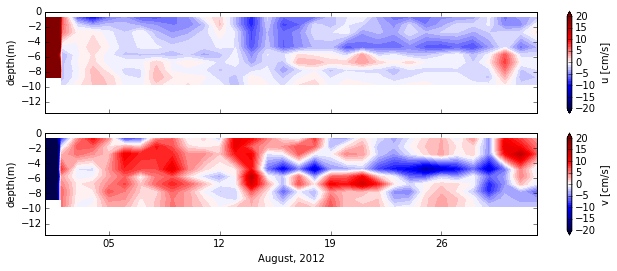

In [117]:
fig, ax = plt.subplots(2,1,figsize=(11,4))

df2contourf(ax[0], df, 'u', np.arange(-20,21,1), 'both', cblabel='u [cm/s]')
df2contourf(ax[1], df, 'v', np.arange(-20,21,1), 'both', cblabel='v [cm/s]')

ax[0].tick_params(labelbottom='off')
ax[1].set_xlabel('August, 2012')
    
#plt.savefig('2015kaiko_obs.png', bbox_inches='tight', transparent=True)

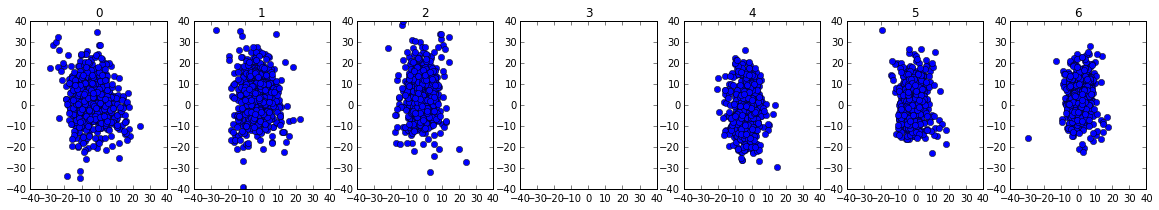

In [98]:
fig, ax = plt.subplots(1,7,figsize=(20,3))

for i in range(7):
    ax[i].plot(df.u[df.layer==i+1], df.v[df.layer==i+1], 'o')
    ax[i].set_xlim(-40,40)
    ax[i].set_ylim(-40,40)
    ax[i].set_title(i)